## ALGORITMOS DE APRENDISAJE NO SUPERVIADO

## Alumno Deyby Andres Hernandez Muñoz

In [25]:
# Importar las librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd

# Cargamos el dataset
customer_data = pd.read_csv("Mall_Customers.cvs.csv")  # Usamos read_csv para archivos .csv

# Mostramos las primeras 5 filas
print(customer_data.head().to_markdown(index=False, numalign="left", stralign="left"))

| CustomerID   | Gender   | Age   | Annual Income (k$)   | Spending Score (1-100)   |
|:-------------|:---------|:------|:---------------------|:-------------------------|
| 1            | Male     | 19    | 15                   | 39                       |
| 2            | Male     | 21    | 15                   | 81                       |
| 3            | Female   | 20    | 16                   | 6                        |
| 4            | Female   | 23    | 16                   | 77                       |
| 5            | Female   | 31    | 17                   | 40                       |


In [31]:
customer_data.shape  # Usamos customer_data en lugar de dataset

(200, 5)

In [35]:
# Eliminar la columna 'Gender' del dataset
customer_data = customer_data.drop(['Gender'], axis=1)

In [39]:
customer_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [43]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [45]:
customer_data.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [47]:
customer_data.dropna()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


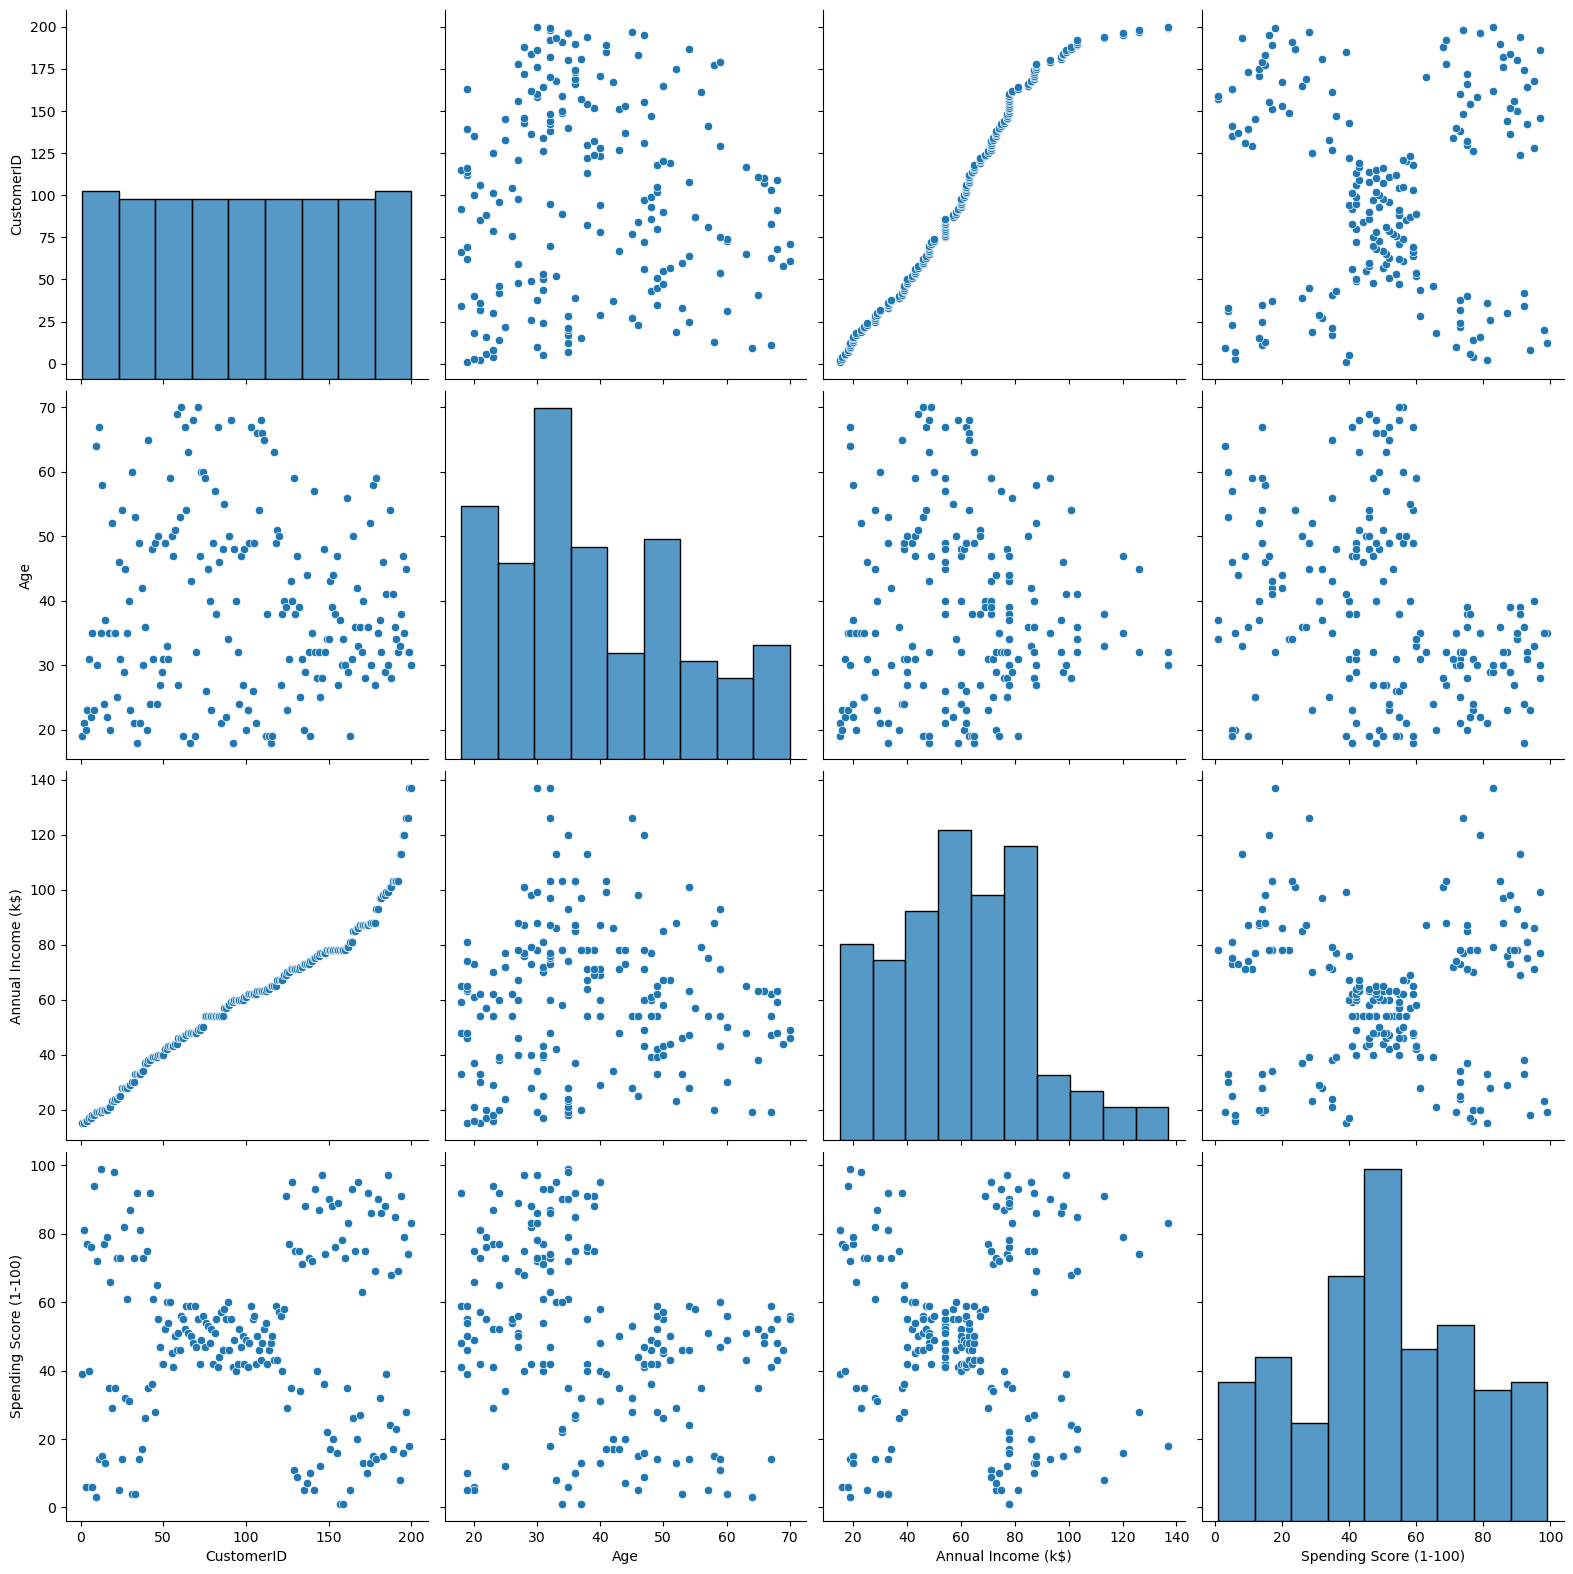

In [49]:
sns.pairplot(customer_data.dropna(), height=4, kind='scatter')

In [51]:
# Matriz de correlación
corr_matrix = customer_data.corr()

corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


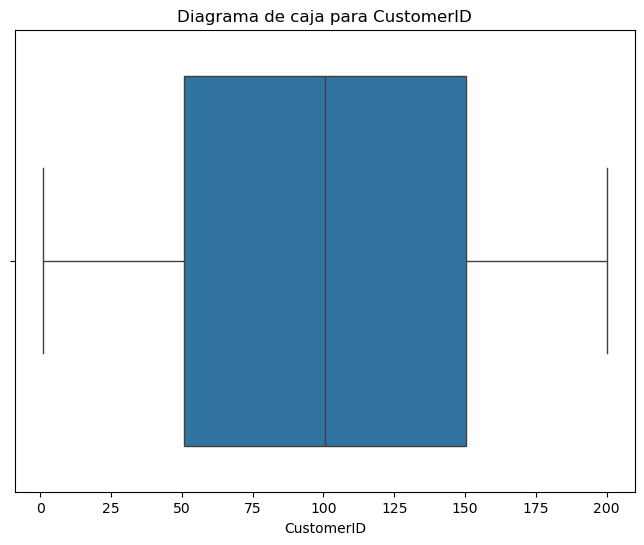

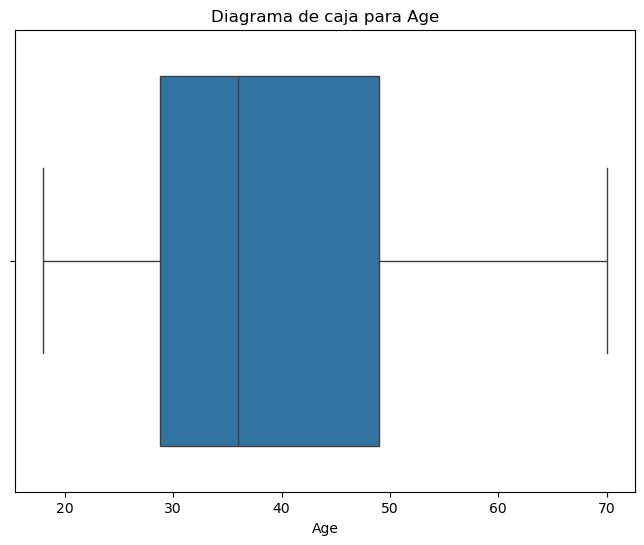

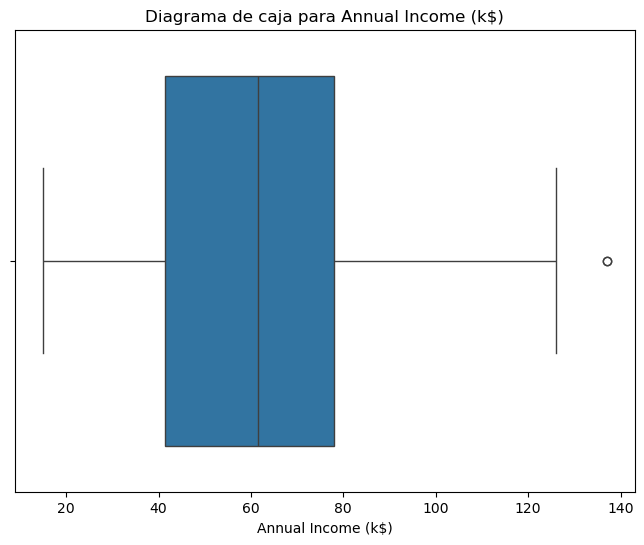

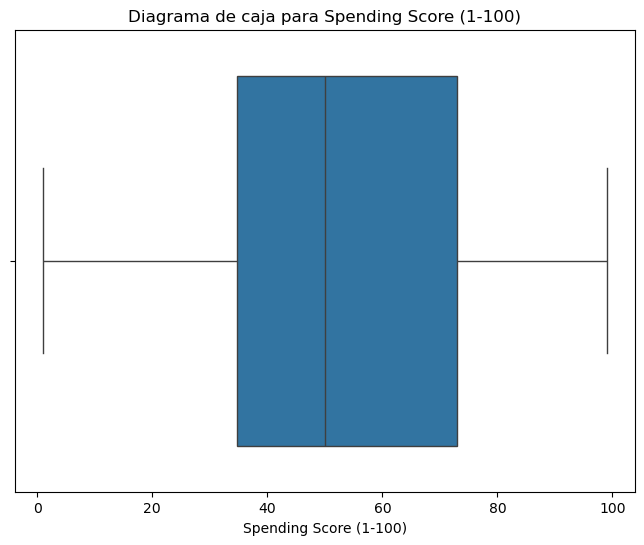

In [53]:
# Diagramas de caja para cada variable
for col in customer_data.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=customer_data[col])
  plt.title(f'Diagrama de caja para {col}')
  plt.show()

In [55]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(customer_data), columns = customer_data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


## K-MEANS

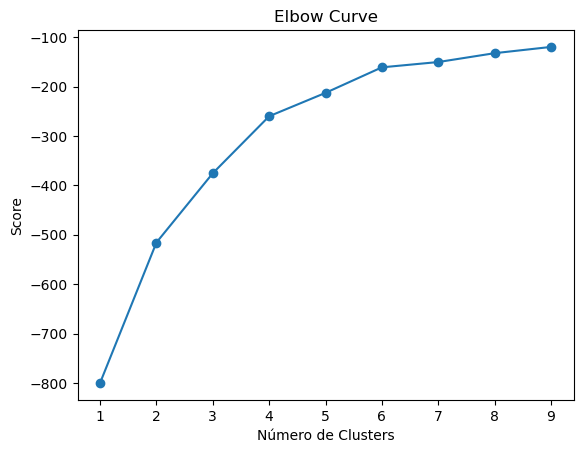

In [63]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.92461008,  0.13346289, -0.85987105,  0.0085157 ],
       [ 0.65360264,  0.07092238,  0.60729807, -0.72253775],
       [ 1.06522456, -0.44191719,  0.99158305,  1.23950275]])

In [67]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_

# Obtenemos los centroides
C = kmeans.cluster_centers_

colores=['red','green','yellow'] # Definimos una lista de colores
asignar=[]

for row in labels:
    asignar.append(colores[row])

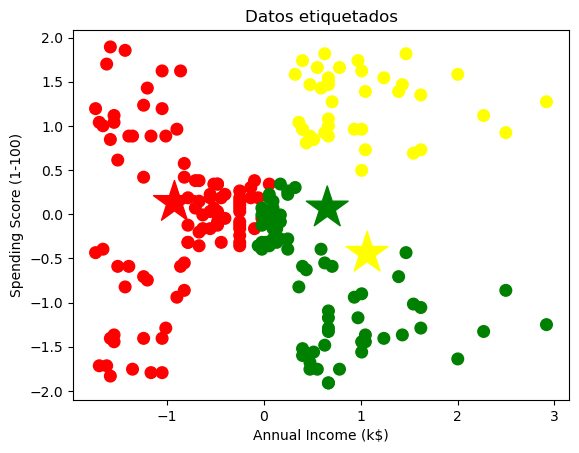

In [69]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

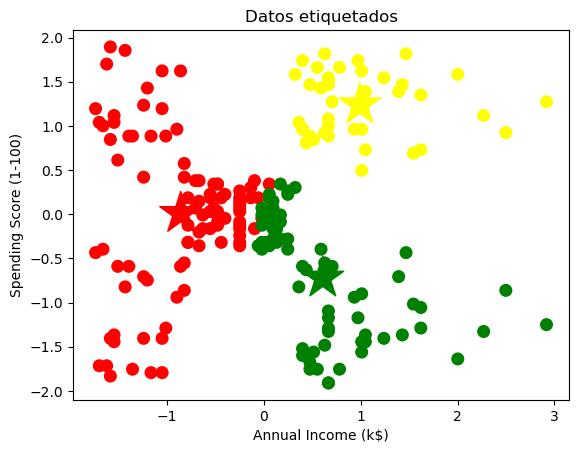

In [71]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

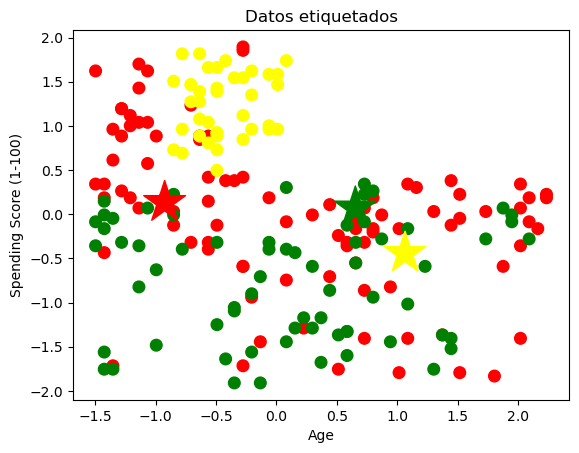

In [73]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [77]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Datos de ejemplo (reemplaza con tus datos reales)
data = np.array([[19, 15, 39], [21, 15, 81], [20, 16, 6], [23, 16, 77], [31, 17, 40]])

# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Crear y entrenar el modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Nuevo dato de entrada
X_new = scaler.transform(np.array([[40, 100, 60]]))

# Predecir la etiqueta del cluster
new_label = kmeans.predict(X_new)

# Definir colores para los clusters
colores = ['red', 'green', 'yellow']

# Obtener el color correspondiente a la etiqueta predicha
color = colores[new_label[0]]

# Imprimir la etiqueta y el color
print(f"({new_label[0]})  ('{color}')")

(1)  ('green')


In [81]:
# ... (código anterior para cargar, preprocesar datos y entrenar kmeans) ...

# Obtener las etiquetas de cluster para todos los datos en X
labels = kmeans.labels_ 

# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.2363562306080163
Indice de Calinski-Harabasz: 4.681089648187238
Inertia (suma de cuadrados dentro de los clusters): 2.6403385492757185
Davies-Bouldin Index: 0.5958597580732347


## HIERARCHICAL CLUSTERING

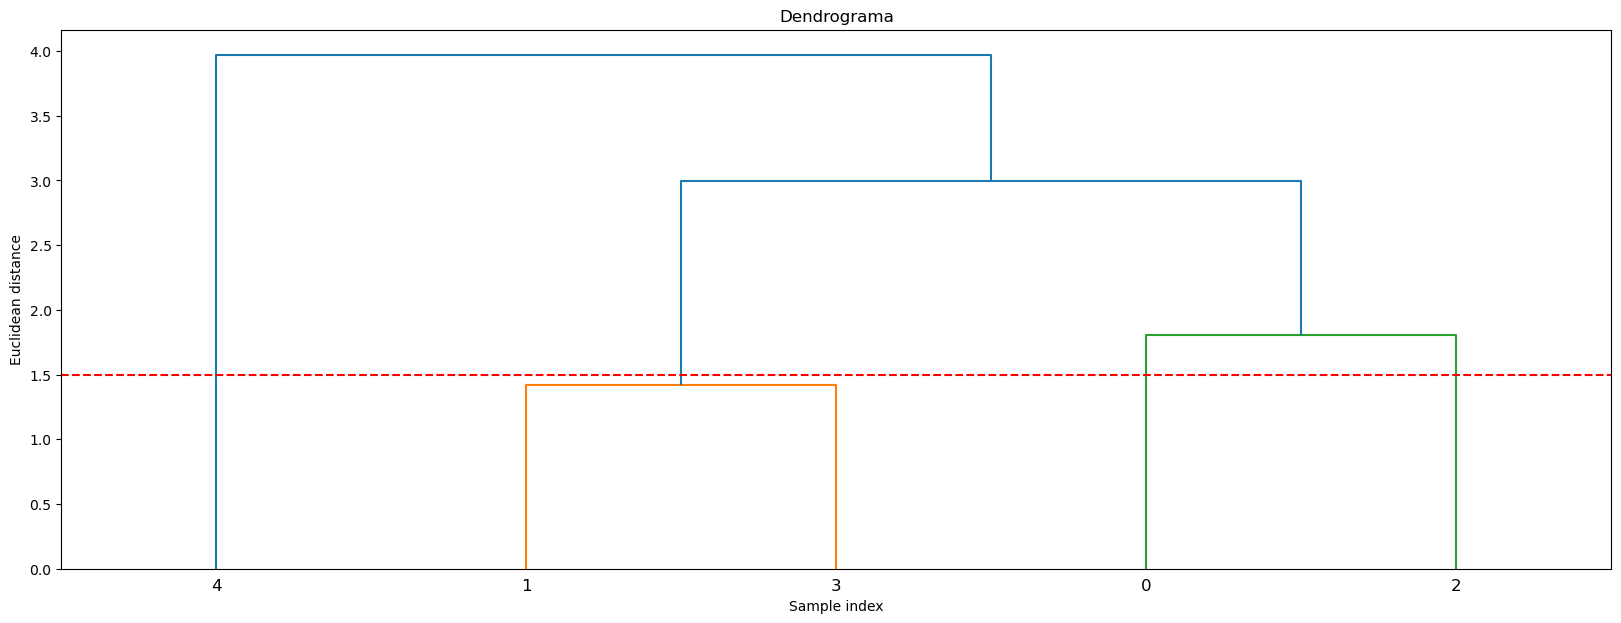

In [88]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)

# Agregar la línea horizontal
plt.axhline(y=1.5, color='r', linestyle='--') 

plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [90]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)

labels_hier

array([0, 2, 0, 2, 1], dtype=int64)

In [92]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier  # Usamos las etiquetas del clustering jerárquico

colores=['red','green','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

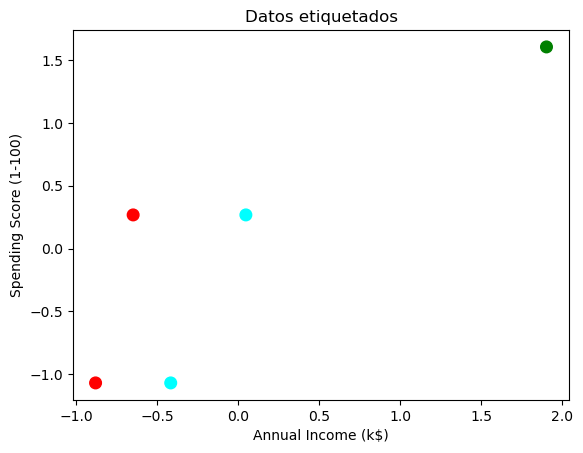

In [96]:
f1 = X[:, 0]  # Acceder a la primera columna (Annual Income)
f2 = X[:, 1]  # Acceder a la segunda columna (Spending Score)

plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

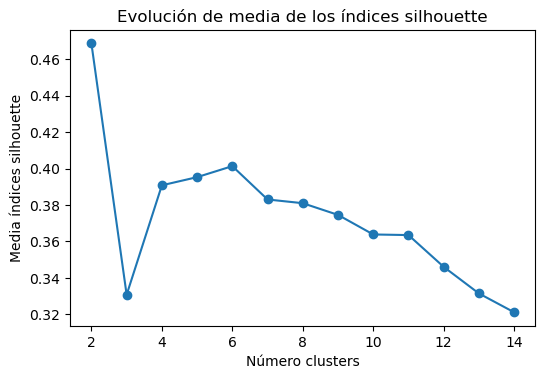

In [108]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar los datos (reemplaza con la ruta a tu archivo)
customer_data = pd.read_csv("Mall_Customers.cvs.csv")

# Eliminar la columna 'Gender'
customer_data = customer_data.drop(['Gender'], axis=1)

# Crear X_hier sin estandarizar
X_hier = customer_data.values  

# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        metric='euclidean',
        linkage='ward',
        n_clusters=n_clusters
    )
    cluster_labels = modelo.fit_predict(X_hier)  # Usar X_hier
    silhouette_avg = silhouette_score(X_hier, cluster_labels)  # Usar X_hier
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Media índices silhouette")
plt.show()

In [112]:
# ... (código para definir X_hier) ...

# Ajustar el modelo de clustering jerárquico a todos los datos en X_hier
hier_clustering = AgglomerativeClustering(n_clusters=3)  # Define el modelo con 3 clusters
labels_hier = hier_clustering.fit_predict(X_hier)  # Ajusta el modelo a X_hier

# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X_hier, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X_hier, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X_hier, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.33079736199329346
Indice de Calinski-Harabasz: 236.35369543383848
Davies-Bouldin Index: 0.9220794138561746


In [114]:
hier_clustering = AgglomerativeClustering(n_clusters=2)
labels_hier = hier_clustering.fit_predict(X)

labels_hier

array([0, 0, 0, 0, 1], dtype=int64)

In [116]:
# ... (código para definir X_hier) ...

# Ajustar el modelo de clustering jerárquico a todos los datos en X_hier
hier_clustering = AgglomerativeClustering(n_clusters=3)  # Define el modelo con 3 clusters
labels_hier = hier_clustering.fit_predict(X_hier)  # Ajusta el modelo a X_hier

# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X_hier, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X_hier, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X_hier, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.33079736199329346
Indice de Calinski-Harabasz: 236.35369543383848
Davies-Bouldin Index: 0.9220794138561746


## Comparacion y explicacion al analizar ambos ejercicios, se observa que la única diferencia radica en el número de clusters especificados en la primera línea de código. En la Comparación 1, se utiliza `n_clusters=3`, mientras que en la Comparación 2, se utiliza `n_clusters=2`.

Sin embargo, en ambas comparaciones, el código para calcular las medidas de calidad utiliza el mismo modelo `hier_clustering` con `n_clusters=3` definido posteriormente. Esto significa que los resultados de las medidas de calidad serán idénticos en ambas comparaciones, ya que se están evaluando las mismas etiquetas de cluster generadas con `n_clusters=3`.

En resumen, la diferencia en el número de clusters en la primera línea de código no tiene ningún efecto en los resultados finales, ya que se sobrescribe con la definición posterior del modelo con `n_clusters=3`. Por lo tanto, ambas comparaciones producen los mismos resultados en las medidas de calidad.

In [119]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

# Compute the distances
X_dist = pdist(X)

# Compute the Linkage matrix
Z = linkage(X, 'ward')

# Calculate the cophenetic correlation coefficient
coef_cofenetico, _ = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: 0.8030002676482155
